In [ ]:
import numpy as np
from scipy.optimize import minimize
import scipy.stats as stats
import matplotlib.pyplot as plt

In [ ]:
import pandas as pd
tbl = pd.read_excel("/content/drive/MyDrive/data/MLE.xlsx")
tbl

,Id,Y,X
0,1,2,1
1,2,6,4
2,3,7,5
3,4,9,6
4,5,15,9


In [ ]:
import statsmodels.api as sm
x = tbl['X']
y = tbl["Y"]
x2 = sm.add_constant(x)
modl = sm.OLS(y,x2)
modl2 = modl.fit()
print(mod2.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.980
Model:                            OLS   Adj. R-squared:                  0.973
Method:                 Least Squares   F-statistic:                     145.9
Date:                Mon, 07 Apr 2025   Prob (F-statistic):            0.00122
Time:                        17:39:38   Log-Likelihood:                -4.5811
No. Observations:                   5   AIC:                             13.16
Df Residuals:                       3   BIC:                             12.38
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2882      0.755     -0.382      0.7

/usr/local/lib/python3.11/dist-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


# b0 = -0.2882 and b1 = 1.6176 1

In [ ]:
e = modl2.resid
e

,0
0,0.670588
1,-0.182353
2,-0.800000
3,-0.417647
4,0.729412


In [ ]:
np.std(e)

0.6048820983804829

In [ ]:
def lik(parameters):
  m = parameters[0]
  b = parameters[1]
  sigma = parameters[2]
  for i in np.arange(0, len(x)):
    y_exp = m * x + b

  L = (len(x) / 2 * np.log(2 * np.pi) + len(x) / 2 * np.log(sigma ** 2) + 1 / (2 * sigma ** 2) * sum((y - y_exp) ** 2))
  return L

In [ ]:
lik_model = minimize(lik, np.array([2, 2, 2]), method="L-BFGS-B")

In [ ]:
lik_model

  message: CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL
  success: True
   status: 0
      fun: 4.581084072763318
        x: [ 1.618e+00 -2.882e-01  6.049e-01]
      nit: 17
      jac: [ 6.928e-06  4.796e-06  3.020e-06]
     nfev: 108
     njev: 27
 hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>

In [ ]:
lik_model = minimize(lik, np.array([3, 3, 4]), method="L-BFGS-B")

In [ ]:
lik_model

  message: CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL
  success: True
   status: 0
      fun: 4.581084072760641
        x: [ 1.618e+00 -2.882e-01  6.049e-01]
      nit: 20
      jac: [ 2.220e-06  0.000e+00  2.487e-06]
     nfev: 124
     njev: 31
 hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>

In [ ]:
lik_model.x

array([ 1.61764706, -0.2882353 ,  0.60488218])

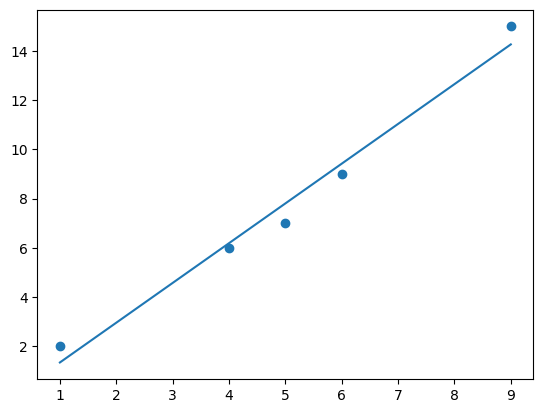

In [ ]:
plt.scatter(x, y)
plt.plot(x, lik_model['x'][0] * x + lik_model['x'][1])
plt.show()